# KNN
for dataSet from https://archive.ics.uci.edu/dataset/19/car+evaluation

In [1]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('car.data')
print(data.head())

X = data[['buying', 'maint', 'safety']].values
y = data[['class']]
X = np.array(X)
print(X)
X.shape

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
[['vhigh' 'vhigh' 'low']
 ['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]


(1728, 3)

## converting data

In [3]:
#X
Le = LabelEncoder()
for i in range(len(X[0])):
    print(X[:,i])
    X[:, i] = Le.fit_transform(X[:, i])
    print(X[:,i])
print(X)
#y
label_mapping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}


['vhigh' 'vhigh' 'vhigh' ... 'low' 'low' 'low']
[3 3 3 ... 1 1 1]
['vhigh' 'vhigh' 'vhigh' ... 'low' 'low' 'low']
[3 3 3 ... 1 1 1]
['low' 'med' 'high' ... 'low' 'med' 'high']
[1 2 0 ... 1 2 0]
[[3 3 1]
 [3 3 2]
 [3 3 0]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


In [4]:
y['class'] = y['class'].map(label_mapping)
y = np.array(y).reshape(-1,1)

C:\Users\Max\AppData\Local\Temp\ipykernel_31748\3301214338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map(label_mapping)


## create model With KNN

In [5]:
print(X.shape)
print(y.shape)

knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction)
print("predictions:", prediction)
print("accuracy: ", accuracy)
a =1677
print("actual value ", y[a])
print("predicted value", knn.predict(X)[a])

(1728, 3)
(1728, 1)
predictions: [2 0 2 1 0 0 0 0 0 2 2 1 0 0 2 1 0 0 1 0 0 0 0 0 0 1 1 0 2 0 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 1 0 0 3 0 1 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 3 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 1 1 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 2 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 3 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 3 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0]
accuracy:  0.7225433526011561
actual value  [0]
predicted value 0


d:\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


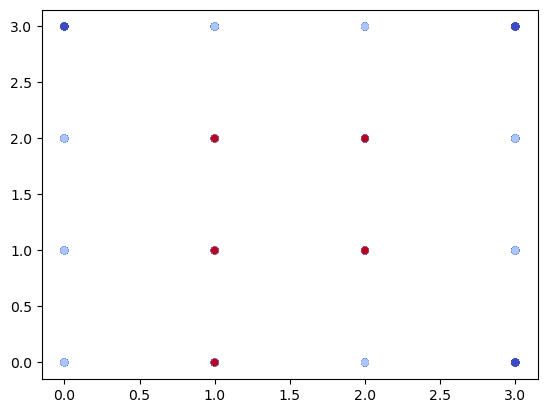

In [6]:
X0, X1 = X[:, 0], X[:, 1]
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20)

# SVM

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
#split it in features and labels
X = iris.data
y = iris.target
db = pd.DataFrame(X, columns=iris.feature_names)

print(db.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [8]:
classes = iris.target_names

print(X.shape)
print(y.shape)
classes

(150, 4)
(150,)


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

print(model)

predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

print("predictions:", predictions)
print("actual value ", y_test)
print("accuracy: ", acc)

SVC(kernel='linear')
predictions: [0 2 1 1 1 0 1 2 0 1 2 0 0 1 0 1 0 0 1 2 0 0 0 0 1 2 0 2 0 2]
actual value  [0 2 1 1 1 0 1 2 0 1 2 0 0 1 0 1 0 0 1 2 0 0 0 0 1 2 0 2 0 2]
accuracy:  1.0
